# **Ejercicios con Keras para Redes Neuronales**
curso: Topicos Avanzados En Inteligencia Computacional <br>
Codigo de Estudiante (1): 171826 <br>
Nombre: Roly Anibal Quellca Hancco

Fecha de Presentación:**28-Jul-21**

@author: RAQH

## **Ejercicio 01: Capas de entrada**
El primer paso para crear un modelo de red neuronal es definir la capa de entrada. Esta capa toma datos sin procesar, generalmente en forma de matrices numpy. La forma de la capa de entrada define cuántas variables utilizará la red neuronal. Por ejemplo, si los datos de entrada tienen 10 columnas, defina una capa de entrada con un shape de (10,).

*Instrucciones:*


*   Importe la función de la capa de entrada desde **keras.layers**.
*   Cree una capa de entrada para 1 variable.



In [1]:
# Import Input from keras.layers
from tensorflow.keras import layers

# Create an input layer of shape 1
input_tensor = layers.Input(shape=(1,))

## **Ejercicio 02: Capas Densas**
Una vez que tenga una capa de entrada, el siguiente paso es agregar una capa densa.

Las capas densas aprenden una matriz de pesos, donde la primera dimensión de la matriz es la dimensión de los datos de entrada y la segunda dimensión es la dimensión de los datos de salida. Recuerde que su capa de entrada tiene la forma de 1 dimensión. En este caso, su capa de salida también tendrá la forma de 1 dimensión. Esto significa que la capa densa aprenderá una matriz de peso de 1x1.

*Instrucciones:*


*   Importe la función de capa densa desde **keras.layers**.
*   Crea una capa densa con 1 unidad.
*   Pase **input_tensor** a **output_layer()**.






In [2]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

## **Ejercicio 03:Capas de salida**
¡Las capas de salida son simplemente capas densas! Las capas de salida se utilizan para reducir la dimensión de las entradas a la dimensión de las salidas.

*Ïnstrucciones:*


*   Importe las funciones Input y Dense desde **keras.layers**.
*   Cree una capa de entrada con shape 1 o una dimensión.
*   Nuevamente, cree una capa densa con 1 unidad y pase **input_tensor** directamente a ella.





In [3]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

## **Ejercicio 04: Construir un modelo**
Una vez que haya definido una capa de entrada y una capa de salida, puede construir un modelo de Keras. El objeto del modelo es cómo se le dice a Keras dónde comienza y termina el modelo: dónde entran los datos y dónde salen las predicciones.

*Instrucciones:*


*   Importe el modelo desde **keras.models** para crear un modelo de keras.
*   Utilice la capa de entrada y la capa de salida ya definidas como entrada y salida del modelo.



In [4]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor )

## **Ejercicio 05: Compilar un modelo**
El último paso para crear un modelo es compilarlo antes de poder ajustarlo a los datos. ¡Esto finaliza su modelo, congela todas sus configuraciones y lo prepara para cumplir con algunos datos!

Durante la compilación, se especifica el **optimizador** que se utilizará para ajustar el modelo a los datos y una función de pérdida. **'adam'** es un buen optimizador predeterminado para usar, y generalmente funcionará bien. La función de pérdida depende del problema en cuestión. El error cuadrático medio es una función de pérdida común y se optimizará para predecir la media, como se hace en la regresión de mínimos cuadrados.

El error absoluto medio optimiza la mediana y se utiliza en la regresión de cuantiles. Para este conjunto de datos, **'mean_absolute_error'** funciona bastante bien, así que utilícelo como función de pérdida.

*Instrucciones:*


*   Compile el modelo que creó (model).
*   Utilice el optimizador **'adam'.**
*   Utilice error absoluto medio (o 'mean_absolute_error') como pérdida.




In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## **Ejercicio 06: Visualiza un modelo**
Ahora que ha compilado el modelo, ¡eche un vistazo al resultado de su arduo trabajo! Puede hacer esto mirando el resumen del modelo, así como su diagrama.

El resumen le dirá los nombres de las capas, así como cuántas unidades tienen y cuántos parámetros hay en el modelo.

El gráfico mostrará cómo las capas se conectan entre sí.

*Instrucciones*


*   Resume el modelo.
*   Trace el modelo.



In [6]:
!apt-get -qq install -y graphviz

In [7]:
!pip3 install pydot

In [8]:
!pip3 install tfp-nightly

     |████████████████████████████████| 5.5 MB 4.8 MB/s 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


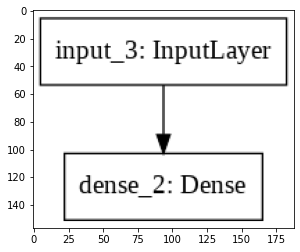

In [9]:
# Import the plotting function
#no funciona parace que funciona en la version antigua de pydot
#from keras.utils import plot_model

from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

## Ejercicio 07: Ajustar el modelo a los datos de baloncesto del torneo
Ahora que el modelo está compilado, ¡está listo para ajustarlo a algunos datos!

En este ejercicio, usará un conjunto de datos de puntajes de los juegos del torneo de baloncesto universitario de EE.UU. Cada fila del conjunto de datos tiene los ID de equipo: team_1 y team_2, como números enteros. También tiene la diferencia de semillas entre los equipos (las semillas son asignadas por el comité del torneo y representan una clasificación de qué tan fuertes son los equipos) y la diferencia de puntuación del juego (por ejemplo, si el team_1 gana por 5 puntos, la diferencia de puntuación es de 5) .

Para ajustar el modelo, proporcione una matriz de X variables (en este caso, una columna: la diferencia inicial) y una matriz de Y variables (en este caso, una columna: la diferencia de puntuación).

El DataFrame de **games_tourney** junto con el objeto de model compilado está disponible en su espacio de trabajo.

*Instrucciones*


*   Ajuste el modelo con **seed_diff** como variable de entrada y **score_diff** como variable de salida.
*   Utilice 1 época, un tamaño de lote de 128 y una división de validación del 10%.



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Read dataset games_tourney and split
games_tourney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/games_tourney.csv')

games_tourney_train,games_tourney_test,y_train,y_test=train_test_split(games_tourney ,games_tourney ['season'],test_size=0.19,random_state=42)

In [12]:
games_tourney_test.shape

(805, 9)

In [13]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['seed_diff'],
          epochs=1,
          batch_size=128,
          validation_split=.10,
          verbose=True)

25/25 [==============================] - 14s 19ms/step - loss: 3.7601 - val_loss: 3.5236


## Ejercicio 08: Evaluar el modelo en un conjunto de prueba
Después de ajustar el modelo, puede evaluarlo con datos nuevos. Le dará al modelo una nueva matriz X (también llamada datos de prueba), le permitirá hacer predicciones y luego comparará con la variable y conocida (también llamada datos objetivo).

Use el DataFrame games_tourney_test junto con el objeto de model ajustado.

*Instrucciones*


*   Asigne los datos prueba (columna **seed_diff**) a X_test.
*   Asigne los datos objetivo (columna **score_diff**) a y_test.
*   Evalúe el modelo en X_test y y_test.

In [14]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']
 

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

10.552151679992676


## Ejercicio 09: Definir búsqueda de equipo
Las capas compartidas permiten que un modelo utilice la misma matriz de peso para varios pasos. En este ejercicio, creará una capa "fortaleza del equipo" que representará a cada equipo con un solo número. Utilizará este número para ambos equipos en el modelo. El modelo aprenderá un número para cada equipo que funciona bien tanto cuando el equipo es team_1 como cuando el equipo es team_2 en los datos de entrada.

*Instrucciones*


*   Cuente el número de equipos únicos.
*   Cree una capa **embedding** que asigne cada ID de equipo a un solo número que represente la fortaleza de ese equipo.
*   La forma de salida debe ser de 1 dimensión (ya que queremos representar a los equipos con un solo número).
*   La longitud de entrada debe ser de 1 dimensión (ya que cada equipo está representado exactamente por un id).



In [15]:
# Read dataset from games_season.csv
import pandas as pd
games_season = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/games_season.csv')

In [16]:
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

## Ejercicio 10: Definir el modelo de equipo
La búsqueda de fortaleza del equipo tiene tres componentes: una entrada, una capa embedding y una capa plana (flatten) que crea la salida.

Si envuelve estas tres capas en un modelo con una entrada y una salida, puede reutilizar esa pila de tres capas en varios lugares.

Tenga en cuenta nuevamente que los pesos de las tres capas se compartirán en todos los lugares donde las usemos.

*Instrucciones*

*   Cree una capa de entrada 1D para la ID del equipo (que será un número entero). ¡Asegúrese de configurar la forma de entrada correcta!
*   Pase esta entrada a la capa de búsqueda de fortaleza del equipo que creó anteriormente.
*   Aplane el resultado de la búsqueda de fortaleza del equipo.
*   Cree un modelo que utilice la entrada 1D como entrada y la fortaleza del equipo plano como salida.

In [17]:
# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

## Ejercicio 11: Definición de dos entradas
En este ejercicio, definirá dos capas de entrada para los dos equipos en su modelo. Esto le permite especificar más adelante en el modelo cómo se utilizarán de manera diferente los datos de cada equipo.

*Instrucciones*

*   Cree una capa de entrada para usar con el equipo 1. Recuerde que nuestra dimensión de entrada es 1.
*   Nombre la entrada "Team-1-In" para que luego puedas distinguirla del equipo 2.
*   Cree una capa de entrada para usar con el equipo 2, denominada "Team-2-In".




In [18]:
# Load the input layer from keras.layers
from keras.layers import Input

# Input layer for team 1
team_in_1 = Input((1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input((1,), name='Team-2-In')

## Ejercicio 12: Busque ambas entradas en el mismo modelo
Ahora que tiene un modelo de fortaleza del equipo y una capa de entrada para cada equipo, puede buscar las entradas del equipo en el modelo de fortaleza del equipo compartido. Las dos entradas compartirán los mismos pesos.

En este conjunto de datos, tiene 10,888 equipos únicos. Desea conocer una calificación de fortaleza para cada equipo, de modo que si algún par de equipos se enfrentan entre sí, puede predecir el puntaje, incluso si esos dos equipos nunca han jugado antes. Además, desea que el índice de fortaleza sea el mismo, independientemente de si el equipo es el equipo local o el equipo visitante.

Para lograr esto, use la capa compartida, definida por el modelo reutilizable (team_strength_model()) que se construyó anteriormente y las dos capas de entrada (team_in_1 y team_in_2) del ejercicio anterior.

*Instrucciones*


*   Busque el ID del primer equipo en el modelo de fortaleza del equipo.
*   Busque el segundo ID de equipo en el modelo de fortaleza del equipo.



In [19]:
# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

## Ejercicio 13: Capa de salida usando capa compartida
Ahora que ha mirado qué tan "fuerte" es cada equipo, reste las fortalezas del equipo para determinar qué equipo se espera que gane el juego.

Esto es un poco como las semillas que usa el comité del torneo, que también son una medida de la fortaleza del equipo. Pero en lugar de utilizar las diferencias iniciales para predecir las diferencias de puntuación, utilizará la diferencia del modelo de fortaleza de su propio equipo para predecir las diferencias de puntuación.

La capa Resta **Subtract** combinará los pesos de las dos capas restándolos.

*Instrucciones*


*   Importe la capa **Subtract** de keras.layers.
*   Combine las búsquedas de fortaleza de dos equipos que hizo anteriormente.



In [20]:
# Import the Subtract layer from keras
from keras.layers import Subtract

# Create a subtract layer using the inputs from the previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

## Ejercicio 14: Modelo usando dos entradas y una salida
Ahora que tiene sus dos entradas (ID de equipo 1 e ID de equipo 2) y salida (diferencia de puntuación), puede envolverlas en un modelo para poder usarlo más tarde para ajustarlos a los datos y evaluar nuevos datos.

*Instrucciones*


*   Defina un modelo con los dos equipos como entradas y use la diferencia de puntuación como salida.
*   Compile el modelo con el optimizador **'adam'** y la pérdida **'mean_absolute_error'**.



In [21]:
# Imports
from keras.layers import Subtract
from keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Ejercicio 15: Ajustar el modelo a los datos de entrenamiento de la temporada regular
Ahora que ha definido un modelo completo de fortaleza del equipo, ¡puede ajustarlo a los datos de baloncesto! Dado que su modelo ahora tiene dos entradas, debe pasar los datos de entrada como una lista.

*Instrucciones*

*   Asigne las columnas 'team_1' y 'team_2' de games_season a input_1 y input_2, respectivamente.
*   Utilice la columna 'score_diff' de games_season como objetivo.
*   Ajuste el modelo usando 1 época, un tamaño de lote de 2048 y una división de validación del 10%.



In [22]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          games_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=.1,
          verbose=True)

138/138 [==============================] - 3s 4ms/step - loss: 12.1015 - val_loss: 11.8378


## Ejercicio 16: Evaluar el modelo en los datos de prueba del torneo.
En este ejercicio, evaluará el modelo en este nuevo conjunto de datos. Esta evaluación le dirá qué tan bien puede predecir los partidos del torneo, basándose en un modelo entrenado con los datos de la temporada regular. Esto es interesante porque muchos equipos juegan entre sí en el torneo que no jugaron en la temporada regular, por lo que es una muy buena comprobación de que su modelo no está sobreajustado.

*Instrucciones*

*   Asigne las columnas 'team_1' y 'team_2' de games_tourney a input_1 y input_2, respectivamente.
*   Evalúe el modelo.



In [23]:
# Get team_1 from the tournament data
input_1 = games_tourney['team_1']

# Get team_2 from the tournament data
input_2 = games_tourney['team_2']

# Evaluate the model using these inputs
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=False))

11.681282997131348


## Ejercicio 17: Crea una capa de entrada para el local o el visitante
Ahora realizarás una mejora en el modelo, como se sabe hay una ventaja del equipo local bien documentada en el baloncesto, por lo que se agregará una nueva entrada al modelo para capturar este efecto.

Este modelo tendrá tres entradas: team_id_1, team_id_2 y home. Los ID de equipo serán números enteros que busque en el modelo de fortaleza de equipo, y la localía será una variable binaria, 1 si el equipo_1 está jugando en casa, 0 si no lo está.

Use *team_strength_model* para aplicarlo a cada entrada, use una capa Concatenar para unir las dos fortalezas del equipo con la variable local vs visitante, y pase el resultado a una capa Densa.

*Instrucciones*


*   Cree tres capas de entrada de forma 1, una para cada equipo 1, equipo 2 y local vs visitante.
*   Busque las entradas del equipo en team_strength_model().
*   Concatene las fortalezas del equipo con la entrada de inicio y paselo a una capa densa.

In [24]:
from keras.layers import Concatenate
from keras.layers import Input, Dense

# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in =Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

## Ejercicio 18: Haz un modelo y compílalo
Ahora que tiene capas de entrada y salida para el modelo de 3 entradas, envuélvalas en una clase de modelo de Keras y luego compile el modelo, para que pueda ajustarlo a los datos y usarlo para hacer predicciones sobre nuevos datos.

*Instrucciones*


*   Cree un modelo utilizando team_in_1, team_in_2 y home_in como entradas y **out** como salida.
*   Compile el modelo usando el optimizador 'adam' y 'mean_absolute_error' como función de pérdida.



In [25]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Ejercicio 19: Ajustar el modelo y evaluar
Utilice el modelo que encajó en el ejercicio anterior (que se entrenó con los datos de la temporada regular) y evalúe el modelo con los datos de los juegos de torneo (games_tourney).

*Instrucciones*

*   Ajuste el modelo al conjunto de datos games_season, utilizando las columnas 'team_1', 'team_2' y 'home' como entradas, y la columna 'score_diff' como objetivo.
*   Ajuste el modelo usando 1 época, división de validación del 10% y un tamaño de lote de 2048.
*   Evalúe el modelo en games_tourney, utilizando las mismas entradas y salidas






In [26]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'],  games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=.1,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']], games_tourney['score_diff'],
               verbose=False)

138/138 [==============================] - 2s 5ms/step - loss: 11.9674 - val_loss: 12.6043


11.690323829650879

In [43]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Ejercicio 20: Resúmenes de modelos
En este ejercicio, observará más de cerca el resumen de uno de sus modelos de 3 entradas disponibles en su espacio de trabajo como modelo. Tenga en cuenta cuántas capas tiene el modelo, cuántos parámetros tiene y cuántos de esos parámetros son entrenables / no entrenables.

*Responda las siguientes preguntas*


*  ¿Cuántos parámetros totales tiene este modelo?
*   ¿Cuántos parámetros entrenables tiene este modelo?
*   ¿Qué capa de su modelo tiene los parámetros más entrenables?





*segun el cuadro resultante de model.summary()* <br>
**¿Cuántos parámetros totales tiene este modelo? <br>**
el total de parametros son: 3 <br>
**¿Cuántos parámetros entrenables tiene este modelo? <br>**
el  total de parametros entrenables son: 3 <br>
**¿Qué capa de su modelo tiene los parámetros más entrenables?<br>**
la capa  dense_6 (Dense) con 2 parametros



## Ejercicio 21: Trazado de modelos
Además de resumir su modelo, también puede trazar su modelo para tener una idea más intuitiva de él.


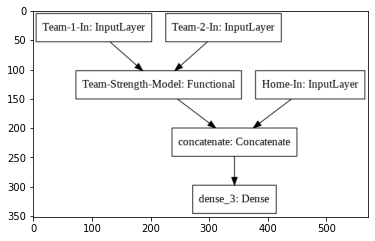

In [27]:
# Imports
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model2.png')

# Display the image
data = plt.imread('model2.png')
plt.imshow(data)
plt.show()

## Ejercicio 22: Agregue las predicciones del modelo a los datos del torneo
Se usó el modelo de la temporada regular para hacer predicciones sobre el conjunto de datos del torneo y se obtuvo muy buenos resultados. Intente mejorar sus predicciones para el torneo modelándolo específicamente.

Utilizará la predicción del modelo de temporada regular como entrada para el modelo de torneo. Esta es una forma de "apilamiento de modelos".

Para comenzar, tome el modelo de temporada regular del ejercicio anterior y prediga los datos del torneo. Agregue esta predicción a los datos del torneo como una nueva columna.

*Instrucciones*


*   Utilice el modelo para predecir en el conjunto de datos games_tourney. El modelo tiene tres entradas: columnas 'equipo_1', 'equipo_2' y 'inicio'. 
*   Asigne las predicciones a una nueva columna, 'pred'.



In [28]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'],games_tourney['team_2'],games_tourney['home']])

## Ejercicio 23: Crea una capa de entrada con múltiples columnas
En este ejercicio, verá una forma diferente de crear modelos con múltiples entradas. Este método solo funciona para datos puramente numéricos, pero es un enfoque mucho más simple para crear redes neuronales multivariadas.

Ahora tiene tres columnas numéricas en el conjunto de datos del torneo: 'seed_diff', 'home' y 'pred'. En este ejercicio, creará una red neuronal que utiliza una sola capa de entrada para procesar las tres entradas numéricas.

Este modelo debe tener una única salida para predecir la diferencia de puntuación del juego del torneo.

*Instrucciones*


*   Cree una sola capa de entrada con 3 columnas.
*   Conecte esta entrada a una capa densa con 1 unidad.
*   Cree un modelo con input_tensor como entrada y output_tensor como salida.
*   Compile el modelo con 'adam' como optimizador y 'mean_absolute_error' como función de pérdida.



In [29]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Ejercicio 24: Ajustar el modelo
Ahora que ha enriquecido el conjunto de datos del torneo y ha creado un modelo para utilizar los nuevos datos, ajuste ese modelo a los datos del torneo.

Tenga en cuenta que este modelo tiene solo una capa de entrada que es capaz de manejar las 3 entradas, por lo que sus entradas y salidas no necesitan ser una lista.

Los juegos de torneo se dividen en un conjunto de entrenamiento y un conjunto de prueba. Los juegos del torneo antes de 2010 están en el conjunto de entrenamiento, y los posteriores a 2010 están en el conjunto de prueba.

*Instrucciones*


*   Ajuste el modelo al conjunto de datos games_tourney_train usando 1 época.
*   Las columnas de entrada son 'home', 'seed_diff' y 'pred'.
* La columna de destino es "score_diff".
 



In [30]:
# Read the dataset enriched
games_tourney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/games_season_enriched.csv')


In [31]:
# Games before 2010
games_tourney_train=games_tourney.loc[games_tourney['season']<2010.0]
games_tourney_train.shape


(3168, 10)

In [32]:
# Games afeter 2010
games_tourney_test = games_tourney.loc[games_tourney['season']>=2010]
games_tourney_test.shape

(1066, 10)

In [33]:
# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

99/99 [==============================] - 1s 1ms/step - loss: 16.8455


## Ejercicio 25: Evaluar el modelo
Ahora que ha ajustado su modelo a los datos de entrenamiento del torneo, evalúelo en los datos de prueba del torneo. Recuerde que los datos de prueba del torneo contienen juegos posteriores a 2010.

*Instrucciones*


*   Evalúe el modelo con los datos de games_tourney_test.
*   Recuerde que las entradas del modelo son las columnas 'home', 'seed_diff' y 'pred' y que la columna de destino es 'score_diff'.



In [34]:
# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'pred']], 
               games_tourney_test['score_diff'], verbose=False))

14.650923728942871


## Ejercicio 26: Modelo simple de dos salidas
En este ejercicio, se utilizará los datos del torneo para crear un modelo que haga dos predicciones: las puntuaciones de ambos equipos en un juego determinado. Las entradas serán la diferencia inicial de los dos equipos, así como la diferencia de puntuación prevista con el modelo que se construyo anteriormente.

El resultado del modelo será la puntuación prevista para el equipo 1 y para el equipo 2. Esto se denomina "regresión de objetivos múltiples": un modelo que hace más de una predicción.

*Instrucciones*

*   Cree una sola capa de entrada con 2 columnas.
*   Conecte esta entrada a una capa densa con 2 unidades.
*   Cree un modelo con input_tensor como entrada y output_tensor como salida.
*   Compile el modelo con 'adam' como optimizador y 'mean_absolute_error' como función de pérdida.





In [35]:
# Define the input
input_tensor = Input((2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam' , loss='mean_absolute_error')

## Ejercicio 27: Ajustar un modelo con dos salidas
Ahora que ha definido un modelo de 2 salidas, ajústelo a los datos del torneo. Use el conjunto de entrenamiento adecuado.

Este modelo utilizará los seeds previos al torneo, así como sus predicciones previos al torneo del modelo de temporada regular que se construyo anteriormente.

Como recordatorio, este modelo predecirá las puntuaciones de ambos equipos.

*Instrucciones*

*   Ajuste el modelo al conjunto de datos **games_tourney_train** usando 100 épocas y un tamaño de lote de 128.
*   Las columnas de entrada son 'seed_diff' y 'pred'.
* Las columnas de destino son 'score_1' y 'score_2'.



In [36]:
# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
  		  epochs=1000,
  		  batch_size=64)

Epoch 1/1000
50/50 [==============================] - 1s 1ms/step - loss: 71.9710
Epoch 2/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.7184
Epoch 3/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.7376
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 71.8809
Epoch 5/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.7478
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.9597
Epoch 7/1000
50/50 [==============================] - 0s 1ms/step - loss: 72.0236
Epoch 8/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.4840
Epoch 9/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.4024
Epoch 10/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.3637
Epoch 11/1000
50/50 [==============================] - 0s 1ms/step - loss: 71.5595
Epoch 12/1000
50/50 [==============================] - 0s 2ms/step - loss: 71.5596
Epoch 13/1000

## Ejercicio 28: Inspeccione el modelo (I)
Utilice el método .get_weights() para inspeccionar los pesos del modelo.

La capa de entrada tendrá 4 pesos: 2 para cada entrada por 2 para cada salida.

La capa de salida tendrá 2 pesos, uno para cada salida.

*Instrucciones*


*   Imprime los pesos del modelo.
*   Imprime las medias de las columnas de los datos de entrenamiento (games_tourney_train).



In [37]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(games_tourney_train.mean())

[array([[ 0.13214543, -0.13526143],
       [ 0.29053825, -0.28319246]], dtype=float32), array([49.954742, 49.962925], dtype=float32)]
season        1.997045e+03
team_1        5.546026e+03
team_2        5.546026e+03
home          0.000000e+00
seed_diff     0.000000e+00
score_diff    0.000000e+00
score_1       7.191225e+01
score_2       7.191225e+01
won           5.000000e-01
pred          1.922915e-15
dtype: float64


## Ejercicio 29: Evaluar el modelo
Ahora que ha ajustado el modelo e inspeccionado sus pesos para asegurarse de que tiene sentido, evalúelo en el conjunto de pruebas del torneo para ver qué tan bien funciona con los nuevos datos.

*Instrucciones*


*   Evalúe el modelo en games_tourney_test.
*   Utilice las mismas entradas y salidas que el conjunto de formación.




In [38]:
# Evaluate the model on the tournament test data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']], games_tourney_test[['score_1', 'score_2']], verbose=False))

19.123628616333008


## Ejercicio 30: Clasificación y regresión en un modelo
Ahora creará un tipo diferente de modelo de 2 salidas. Esta vez, predecirá la diferencia de puntuación, en lugar de las puntuaciones de ambos equipos, y luego predecirá la probabilidad de que el equipo 1 gane el juego. Este es un modelo bastante bueno: ¡hará tanto clasificación como regresión!

En este modelo, desactive el sesgo o intercepte para cada capa. Sus entradas (diferencia inicial y diferencia de puntuación predicha) tienen una media muy cercana a cero, y sus salidas tienen medias cercanas a cero, por lo que su modelo no debería necesitar el término de sesgo para ajustarse bien a los datos.

*Instrucciones*


*   Cree una sola capa de entrada con 2 columnas.
*   La primera capa de salida debe tener 1 unidad con activación 'lineal' y sin término de sesgo.
*   La segunda capa de salida debe tener 1 unidad con activación 'sigmoidea' y sin término de sesgo. Además, use la primera capa de salida como entrada a esta capa.
*   Cree un modelo con estas entradas y salidas.



In [39]:
# Create an input layer with 2 columns
input_tensor = Input((2, ))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

## Ejercicio 31: Compilar y ajustar el modelo
Ahora que tiene un modelo con 2 salidas, compílelo con 2 funciones de pérdida: error absoluto medio (MAE) para 'score_diff' y entropía cruzada binaria (también conocida como logloss) para 'won'. Luego ajuste el modelo con 'seed_diff' y 'pred' como entradas. Para las salidas, predice 'score_diff' y 'won'.

Este modelo puede usar las puntuaciones de los juegos para asegurarse de que las partidas cerradas (diferencia de puntuación pequeña) tengan probabilidades de ganar más bajas que las explosiones (diferencia de puntuación grande).

El problema de regresión es más fácil que el problema de clasificación porque MAE castiga menos al modelo por una pérdida debida al azar. Por ejemplo, si score_diff es -1 y ganó 0, eso significa que team_1 tuvo mala suerte y perdió por un solo tiro libre. Los datos del problema fácil ayudan al modelo a encontrar una solución al problema difícil.

*Instrucciones*

*   Importe Adam desde keras.optimizers.
* Compile el modelo con 2 pérdidas: 'mean_absolute_error' y 'binary_crossentropy', y use el optimizador de Adam con una tasa de aprendizaje de 0.01.
* Ajuste el modelo con las columnas 'seed_diff' y 'pred' como entradas y las columnas 'score_diff' y 'won' como objetivos.
* Utilice 10 épocas y un tamaño de lote de 16384.



In [40]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(lr=0.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1/1 [==============================] - 1s 986ms/step - loss: 25.2936 - dense_6_loss: 17.1653 - dense_7_loss: 8.1283
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 24.9386 - dense_6_loss: 17.0382 - dense_7_loss: 7.9004
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 24.5872 - dense_6_loss: 16.9117 - dense_7_loss: 7.6755
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 24.2390 - dense_6_loss: 16.7854 - dense_7_loss: 7.4536
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 23.8945 - dense_6_loss: 16.6598 - dense_7_loss: 7.2347
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 23.5538 - dense_6_loss: 16.5349 - dense_7_loss: 7.0189
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 23.2175 - dense_6_loss: 16.4112 - dense_7_loss: 6.8063
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 22.8846 - dense_6_loss: 16.2877 - dense_7_loss: 6.5969
Epoch 

## Ejercicio 32: Inspeccione el modelo (II)
Ahora debería echar un vistazo a los pesos de este modelo. En particular, tenga en cuenta el último peso del modelo. Este peso convierte la diferencia de puntuación prevista en una probabilidad de victoria prevista. Si multiplica la diferencia de puntuación predicha por el último peso del modelo y luego aplica la función sigmoidea, obtiene la probabilidad de ganar del juego.

*Instrucciones*


*   Imprima los pesos del modelo.
*   Imprima las medias de las columnas de los datos de entrenamiento (games_tourney_train).
* Imprima la probabilidad de victoria aproximada predicha para un juego cerrado (1 punto de diferencia).
* Imprima la probabilidad de victoria aproximada pronosticada en el juego explosivo (diferencia de 10 puntos).



In [41]:
# Print the model weights
print(model.get_weights())

# Print the training data means
print(games_tourney_train.mean())

# Import the sigmoid function from scipy
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability predicted close game
print(sigmoid(1 * weight))

# Print the approximate win probability predicted blowout game
print(sigmoid(10 * weight))

[array([[ 0.4678363],
       [-0.8475568]], dtype=float32), array([[1.2854347]], dtype=float32)]
season        1.997045e+03
team_1        5.546026e+03
team_2        5.546026e+03
home          0.000000e+00
seed_diff     0.000000e+00
score_diff    0.000000e+00
score_1       7.191225e+01
score_2       7.191225e+01
won           5.000000e-01
pred          1.922915e-15
dtype: float64
0.5349429451582145
0.8021838885585818


## Ejercicio 33: Evaluar en nuevos datos con dos métricas
Ahora que ha ajustado su modelo e inspeccionado sus pesos para asegurarse de que tengan sentido, evalúe su modelo en el conjunto de pruebas del torneo para ver qué tan bien funciona con los nuevos datos.

Tenga en cuenta que en este caso, Keras devolverá 3 números: el primer número será la suma de ambas funciones de pérdida, y luego los 2 números siguientes serán las funciones de pérdida que utilizó al definir el modelo.

*Instrucciones*
* Evalúe el modelo en games_tourney_test.
* Utilice las mismas entradas y salidas que el conjunto de formación.

In [42]:
# Evaluate the model on new data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

[19.76314353942871, 14.61725902557373, 5.14588737487793]
